In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('water_dataX.csv', encoding = 'unicode_escape')
dataset.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [3]:
dataset.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [5]:
# finding null values
dataset.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [6]:
dataset.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [7]:
# Converting object data type to numeric
dataset['Temp']=pd.to_numeric(dataset['Temp'], errors='coerce')
dataset['D.O. (mg/l)']=pd.to_numeric(dataset['D.O. (mg/l)'], errors='coerce')
dataset['PH']=pd.to_numeric(dataset['PH'], errors='coerce')
dataset['B.O.D. (mg/l)']=pd.to_numeric(dataset['B.O.D. (mg/l)'], errors='coerce')
dataset['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(dataset['CONDUCTIVITY (µmhos/cm)'], errors='coerce')
dataset['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(dataset['NITRATENAN N+ NITRITENANN (mg/l)'], errors='coerce')
dataset['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(dataset['TOTAL COLIFORM (MPN/100ml)Mean'], errors='coerce')
dataset['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(dataset['FECAL COLIFORM (MPN/100ml)'], errors='coerce')
dataset.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [8]:
# Replacing string NAN values with actual NAN value (np.nan)
def convert_to_nan(dataset):
    n_col = dataset.shape[1]
    for index in range(n_col):
        dataset.iloc[:, index]  = dataset.iloc[:, index].replace("NAN", np.nan)
    return dataset

dataset = convert_to_nan(dataset)

In [9]:
# finding null values
dataset.isnull().any()

STATION CODE                         True
LOCATIONS                            True
STATE                                True
Temp                                 True
D.O. (mg/l)                          True
PH                                   True
CONDUCTIVITY (µmhos/cm)              True
B.O.D. (mg/l)                        True
NITRATENAN N+ NITRITENANN (mg/l)     True
FECAL COLIFORM (MPN/100ml)           True
TOTAL COLIFORM (MPN/100ml)Mean       True
year                                False
dtype: bool

In [10]:
# Checking for missing values
dataset.isnull().sum()

STATION CODE                        122
LOCATIONS                           184
STATE                               761
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)          316
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [11]:
# numeric data - NULL values to median
from sklearn.impute import SimpleImputer
dataset_numeric = dataset.select_dtypes(exclude="object")
dataset_numeric_col = dataset_numeric.columns
imputer = SimpleImputer(strategy="median")

dataset_numeric = imputer.fit_transform(dataset_numeric)
dataset_numeric = pd.DataFrame(dataset_numeric, columns=dataset_numeric_col)

In [12]:
dataset_numeric

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...
1986,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [13]:
# categorical data - NULL values
dataset_categorical = dataset.select_dtypes(include="object")
dataset_categorical.isnull().sum()

STATION CODE    122
LOCATIONS       184
STATE           761
dtype: int64

In [14]:
# handling missing values (categorical)
pd.set_option('mode.chained_assignment', None)
dataset_categorical_copy = dataset_categorical.copy()
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

# 1330 - nan values replaced with TN
dataset_categorical_copy["STATE"][dataset_categorical_copy["STATION CODE"] == "1330"] = dataset_categorical_copy["STATE"][dataset_categorical_copy["STATION CODE"] == "1330"].fillna("TAMILNADU")
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [15]:
def fill_locations(dataset_categorical):
    location_null = dataset_categorical[dataset_categorical["LOCATIONS"].isnull()]
    location_null_indices = location_null.index
    for index in location_null_indices:
        state_value = location_null["STATE"][index]
        location_null["LOCATIONS"][index] = state_value
        location_null["STATE"][index] = np.nan
    dataset_categorical[dataset_categorical["LOCATIONS"].isnull()] = location_null
    return

fill_locations(dataset_categorical_copy)
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [16]:
dataset_categorical_copy[dataset_categorical_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,NaN,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [17]:
def fill_code(dataset_categorical):
    station_null = dataset_categorical[dataset_categorical["STATION CODE"].isnull()]
    station_null_indices = station_null.index
    for index in station_null_indices:
        stat_code = np.nan
        location_index = station_null["LOCATIONS"][index]
        code_at_location = dataset_categorical["STATION CODE"][dataset_categorical["LOCATIONS"] == location_index]
        for index_code in code_at_location.index:
            if (code_at_location[index_code] != np.nan):
                stat_code = code_at_location[index_code]
                break
        station_null["STATION CODE"][index] = stat_code
    dataset_categorical[dataset_categorical["STATION CODE"].isnull()] = station_null
    return

fill_code(dataset_categorical_copy)
dataset_categorical_copy[dataset_categorical_copy["LOCATIONS"] == "TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NaN
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [18]:
def fill_state(dataset_categorical):
    station_code = dataset_categorical["STATION CODE"].unique()
    for index in range(station_code.shape[0]):
        if (station_code[index] != np.nan):
            df_state = dataset_categorical["STATE"][dataset_categorical["STATION CODE"] == station_code[index]] 
            state_values = dataset_categorical["STATE"][dataset_categorical["STATION CODE"] == station_code[index]]
            state = np.nan
            for index_state in range(state_values.shape[0]):
                if (state_values.iloc[index_state] != np.nan):
                    state = state_values.iloc[index_state]
                    break
            df_state_fill = df_state.fillna(state) 
            dataset_categorical["STATE"][dataset_categorical["STATION CODE"] == station_code[index]] = df_state_fill
    return
fill_state(dataset_categorical_copy)
dataset_categorical_copy[dataset_categorical_copy["STATION CODE"] == "1330"]

,STATION CODE,LOCATIONS,STATE
166,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
424,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
677,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1168,1330,TAMBIRAPARANI AT ARUMUGANERI,TAMILNADU
1351,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1513,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1626,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1745,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1896,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU


In [19]:
# check for missing values
dataset_categorical_copy.isnull().sum()

STATION CODE     5
LOCATIONS        3
STATE           13
dtype: int64

In [20]:
dataset_categorical_copy[dataset_categorical_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1106,1207,KABBANI AT MUTHANKARA,NaN
1107,1208,BHAVANI AT ELACHIVAZHY,NaN
1650,2047,"NNANCHOE (ATTAWA CHOE), CHANDIGARH",NaN
1651,2048,"PATIALA KI RAO, CHANDIGARH",NaN
1652,2049,"SUKHNA CHOE, CHANDIGARH",NaN
1770,2047,NNANCHOE (ATTAWA CHOE),NaN
1771,2048,PATIALA KI RAO,NaN
1772,2049,SUKHNA CHOE,NaN


In [21]:
dataset_categorical_copy["STATE"][1106] = "KERALA"
dataset_categorical_copy["STATE"][1107] = "KERALA"
dataset_categorical_copy["STATE"][1650] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1651] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1652] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1770] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1771] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1772] = "CHANDIGARH"
dataset_categorical_copy["STATE"][1784] = "DAMAN & DIU"
dataset_categorical_copy["STATE"][1785] = "DAMAN & DIU"

In [22]:
dataset_categorical_copy.isnull().sum()

STATION CODE    5
LOCATIONS       3
STATE           3
dtype: int64

In [23]:
dataset_categorical_copy[dataset_categorical_copy["STATE"].isnull()]

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1912,NaN,NaN,NaN


In [24]:
dataset_null = dataset_categorical_copy[(dataset_categorical_copy["STATION CODE"].isnull()) & (dataset_categorical_copy["LOCATIONS"].isnull()) & (dataset_categorical_copy["STATE"].isnull())]
dataset_null_indices = dataset_null.index
dataset_categorical_copy.drop(dataset_null_indices, axis=0, inplace=True)
dataset_null

,STATION CODE,LOCATIONS,STATE
260,NaN,NaN,NaN
431,NaN,NaN,NaN
1912,NaN,NaN,NaN


In [25]:
dataset_categorical_copy.isnull().sum()

STATION CODE    2
LOCATIONS       0
STATE           0
dtype: int64

In [26]:
station_null=dataset_categorical_copy[(dataset_categorical_copy["STATION CODE"].isnull())]
station_null

,STATION CODE,LOCATIONS,STATE
1784,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",DAMAN & DIU
1785,NaN,"DAMANGANGA AT CIRCUIT HOUSE, SILVASA, DADRA AN...",DAMAN & DIU


In [27]:
dataset_categorical_copy.drop(station_null.index, axis=0, inplace=True)

In [28]:
dataset_categorical_copy.isnull().sum()

STATION CODE    0
LOCATIONS       0
STATE           0
dtype: int64

In [29]:
dataset_categorical=dataset_categorical_copy

In [30]:
dataset_final=pd.concat([dataset_categorical, dataset_numeric], axis=1)
dataset_final.isnull().sum()

STATION CODE                        5
LOCATIONS                           5
STATE                               5
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [31]:
dataset_final[(dataset_final["STATION CODE"].isnull()) & (dataset_final["LOCATIONS"].isnull()) & (dataset_final["STATE"].isnull())]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
1784,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.0000,1.010,1200.0,37000.0,2005.0
1785,NaN,NaN,NaN,27.0,6.7,7.3,183.0,112.0000,5.500,1200000.0,6400000.0,2005.0
1912,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2003.0


In [32]:
dataset_null = dataset_final[(dataset_final["STATION CODE"].isnull()) & (dataset_final["LOCATIONS"].isnull()) & (dataset_final["STATE"].isnull())]
dataset_null_indices = dataset_null.index
dataset_final.drop(dataset_null_indices, axis=0, inplace=True)
dataset_null

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
431,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2013.0
1784,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.0000,1.010,1200.0,37000.0,2005.0
1785,NaN,NaN,NaN,27.0,6.7,7.3,183.0,112.0000,5.500,1200000.0,6400000.0,2005.0
1912,NaN,NaN,NaN,27.0,6.7,7.3,183.0,1.8965,0.516,221.0,468.0,2003.0


In [33]:
dataset_final.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [34]:
dataset_final.shape

(1986, 12)

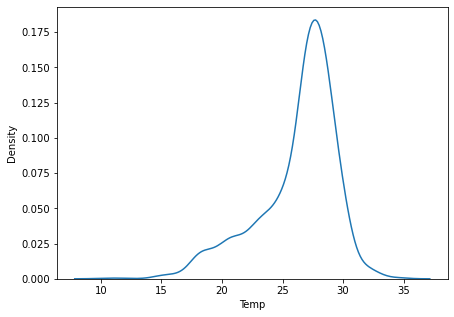

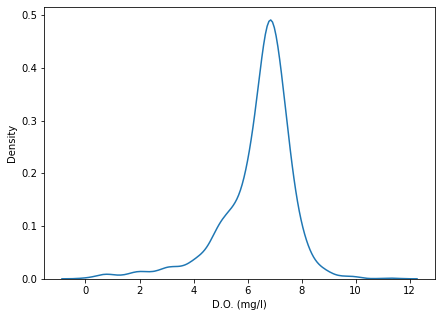

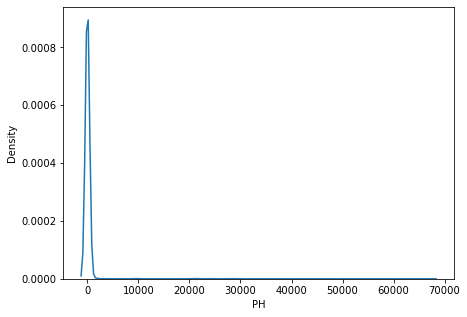

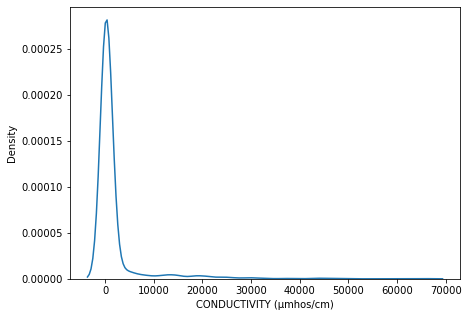

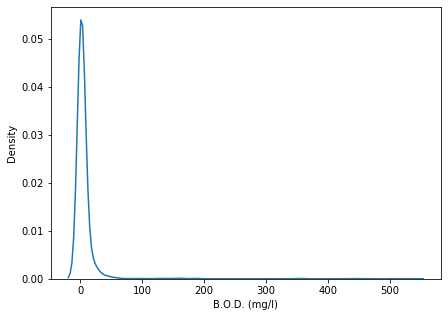

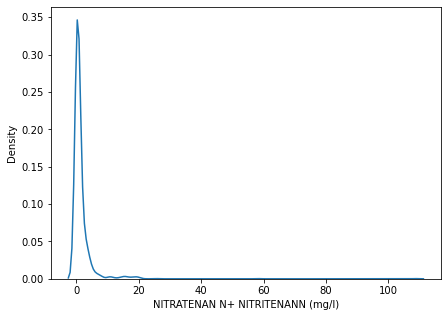

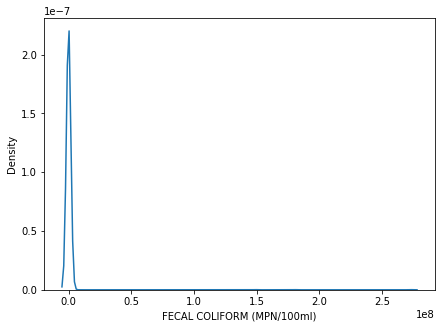

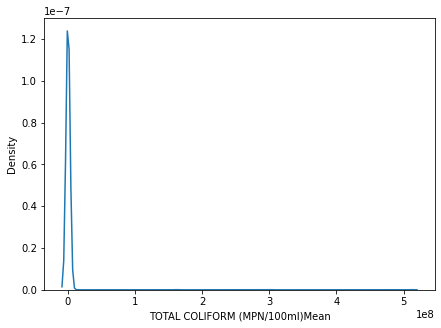

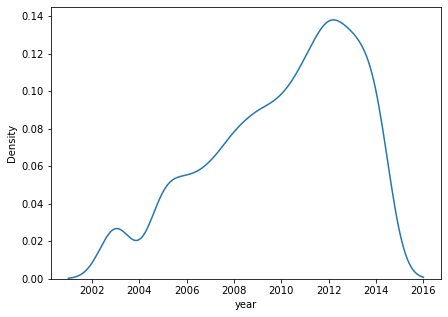

In [35]:
# features - probability distribution graphs
numerical_dataset = dataset_final.select_dtypes(exclude="object")

def plot_kde(dataset):
    n_col = dataset.shape[1]
    for index in range(n_col):
        col_index = dataset.iloc[:, index]
        fig, ax = plt.subplots(1,1, figsize=(7, 5))
        sns.kdeplot(data=dataset, x=col_index.name)
        
plot_kde(numerical_dataset)

In [36]:
# detecting outliers - z-score
from scipy.stats import zscore
numerical_dataset_norm = zscore(numerical_dataset, axis=0)

def indices_of_greater_than_3(dataset_norm):
    indices_arr = []
    n_col = dataset_norm.shape[1]
    for index in range(n_col):
        col_index = dataset_norm.iloc[: ,index]
        greater_than_3 = dataset_norm[col_index > 3]
        greater_than_3_index = greater_than_3.index
        indices_arr.extend(greater_than_3_index)
    return indices_arr

indices_arr = indices_of_greater_than_3(numerical_dataset_norm)
print("Number of outliers using Z-Score method-",len(indices_arr))
dataset_final.iloc[indices_arr, :]

Number of outliers using Z-Score method- 138


,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
741,2880,NAMBUL RIVER AT BISHNUPUR,MANIPUR,28.0,8.2,7.6,112.0,2.1,0.516,2.210000e+02,31.0,2012.0
745,2856,"THOUBAL RIVER AT YAIRIPOK, THOUBAL",MANIPUR,30.0,9.3,7.6,193.0,2.3,0.516,2.210000e+02,41.0,2012.0
1919,1148,"AMBIKA AT BILIMORA, GUJARAT",GUJARAT,30.0,8.0,1708.0,7.8,3.5,0.516,2.210000e+02,2051.0,2003.0
1926,17,"PERIYAR AT ALWAYE, KERALA",KERALA,28.0,6.4,1579.0,5.8,1.7,0.513,5.130000e-01,959.0,2003.0
1927,18,"PERIYAR AT KALADY, KERALA",KERALA,27.0,6.8,62.0,7.5,1.5,0.221,2.210000e-01,892.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.000,1.328000e+03,4975.0,2013.0
685,1023,GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA),PUNJAB,21.0,5.5,7.4,635.0,8.8,5.080,1.400000e+03,5500.0,2012.0
172,3023,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUE...",TAMILNADU,24.3,0.9,7.6,2039.0,104.5,0.900,2.725216e+08,511090873.0,2014.0
432,1023,"GHAGGAR AT MUBARAKPUR REST HOUSE (PATIALA), PU...",PUNJAB,23.3,5.5,7.2,636.0,9.7,4.000,1.328000e+03,4975.0,2013.0


In [37]:
# outlier treatment - standardizing at the end

dataset_final.drop(indices_arr, axis=0, inplace=True)
dataset_final.shape

(1861, 12)

In [38]:
numerical_dataset

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...
1986,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [39]:
dataset_final

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0


In [40]:
# applying wqi formula
numerical_dataset = dataset_final.select_dtypes(exclude="object")
numerical_dataset.drop(["year"], axis=1, inplace=True)

# Weight Vector(wi)
wi = np.array([0.2213, 0.2604, 0.0022, 0.4426, 0.0492, 0.0221, 0.0022])

# Standard values of parameters(si)
si = np.array([10, 8.5, 1000, 5, 45, 100, 1000])

# Ideal values of paramters(vIdeal)
vIdeal = np.array([14.6, 7, 0, 0, 0, 0, 0])

def calc_wqi(sample): 
    wqi_sample = 0
    num_col = 7
    for index in range(num_col):
        v_index = sample[index] # Obeserved value of sample at index
        v_index_ideal = vIdeal[index] # Ideal value of obeserved value
        w_index = wi[index] # weight of corresponding parameter of obeserved value
        std_index = si[index] # Standard value recommended for obeserved value
        q_index = (v_index - v_index_ideal) / (std_index - v_index_ideal)
        q_index = q_index * 100 # Final qi value of obeserved value
        wqi_sample += q_index*w_index
    return wqi_sample

In [41]:
numerical_dataset

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0
...,...,...,...,...,...,...,...,...
1986,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0
1987,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0
1988,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0
1989,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0


In [42]:
# Computing WQI for the whole dataset
def calc_wqi_for_dataset(dataset):
    wqi_arr = []
    for index in range(dataset.shape[0]):
        index_row = dataset.iloc[index, :]
        wqi_row = calc_wqi(index_row)
        wqi_arr.append(wqi_row)
    return wqi_arr

In [43]:
wqi_arr = calc_wqi_for_dataset(numerical_dataset)
# Converting oridnary array to numpy array
wqi_arr = np.array(wqi_arr)
wqi_arr = np.reshape(wqi_arr, (-1, 1))

# Resetting index values of the dataframes
wqi_arr_dataset = pd.DataFrame(wqi_arr, columns=["WQI"]).reset_index()
dataset_final = dataset_final.reset_index()

In [44]:
numerical_dataset.shape

(1861, 8)

In [45]:
# Combining dataframe of WQI and dataframe of attributes 
dataset_wqi = pd.concat([dataset_final, pd.DataFrame(wqi_arr, columns=["WQI"])], axis=1, join='outer')
dataset_wqi.shape

(1861, 14)

In [46]:
dataset_wqi

,index,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,WQI
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,2014.0,1714.987718
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,2014.0,1578.649113
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,2014.0,1501.577098
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,2014.0,474.663944
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,2014.0,643.174383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1856,1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,2003.0,20.172739
1857,1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.0,7.5,585.0,6.3,2.6000,0.155,0.155,315.0,2003.0,-4.412495
1858,1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,2003.0,1.045531
1859,1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.0,7.7,91.0,6.5,1.3000,0.516,221.000,562.0,2003.0,5.446525


In [47]:
dataset_wqi.isnull().sum()

index                               0
STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
WQI                                 0
dtype: int64

In [48]:
dataset_wqi[(dataset_wqi["WQI"].isnull())]

,index,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,WQI


In [49]:
dataset_wqi[(dataset_wqi["WQI"] < 0)]

,index,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,WQI
1779,1901,1448,"NAGAVALLI AT THOTAPALLI REGULATOR, AP",ANDHRA PRADESH,30.0,7.8,239.0,6.2,1.7,2.188,2.188,10720.0,2004.0,-5.029708
1780,1902,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.0,7.5,442.0,6.7,3.4,0.516,221.000,132.0,2004.0,-0.759125
1781,1903,1475,ZUARI AT PANCHAWADI,GOA,29.0,7.0,430.0,6.4,2.4,0.516,221.000,175.0,2003.0,-12.206698
1782,1904,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,29.0,7.2,216.0,7.1,1.8,0.516,221.000,167.0,2003.0,-2.650978
1783,1905,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,29.0,7.9,352.0,4.5,4.2,0.516,221.000,158.0,2003.0,-13.221858
1785,1907,1544,"RIVER VALVANT AT SANKLI NAN BICHOLIM, GOA",GOA,29.0,6.8,65.0,7.5,1.8,0.516,221.000,171.0,2003.0,-6.087398
1789,1911,1548,"RIVER ASSONORA AT ASSONORA, GOA",GOA,28.0,6.6,76.0,7.1,1.9,0.516,221.000,169.0,2003.0,-8.275975
1792,1916,1861,RIVER PURNA ON BRIDGE AT SURATNANNAVSARI HIGHWAY,GUJARAT,29.0,8.1,443.0,4.0,2.0,0.516,221.000,6477.0,2003.0,-14.396371
1794,1918,1865,RIVER DHADAR AT KOTHADA,GUJARAT,32.0,7.8,1304.0,4.6,19.5,0.516,221.000,63.0,2003.0,-26.623027
1796,1920,1149,"KOLAK AT PATALIA BDG., GUJARAT",GUJARAT,28.0,7.5,1175.0,5.7,4.0,0.516,221.000,3900.0,2003.0,-4.573395


In [50]:
# Removing the samples with negative WQI
dataset_neg_indices = dataset_wqi[(dataset_wqi["WQI"] < 0)].index
dataset_wqi.drop(dataset_neg_indices, axis=0, inplace=True)

In [51]:
dataset_wqi.head()

,index,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,WQI
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.1,11.0,27.0,2014.0,1714.987718
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0,2014.0,1578.649113
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0,2014.0,1501.577098
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0,2014.0,474.663944
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0,2014.0,643.174383


In [52]:
dataset_wqi.shape

(1824, 14)

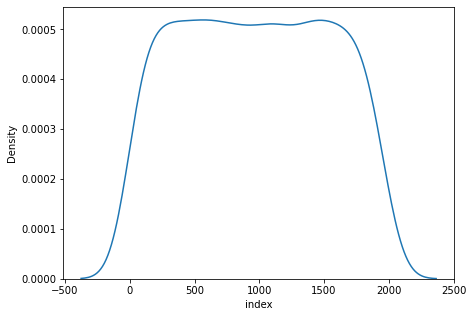

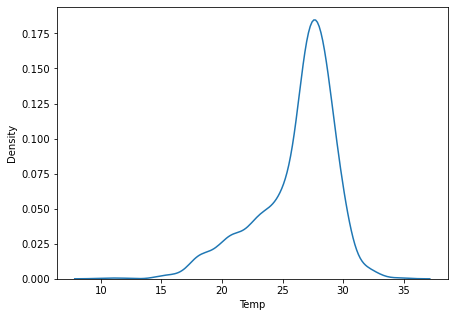

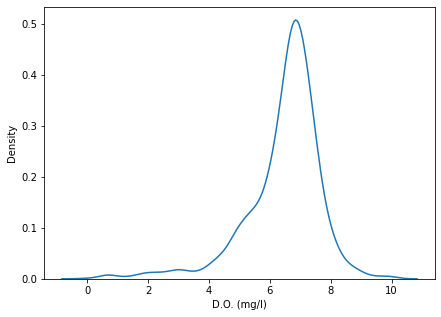

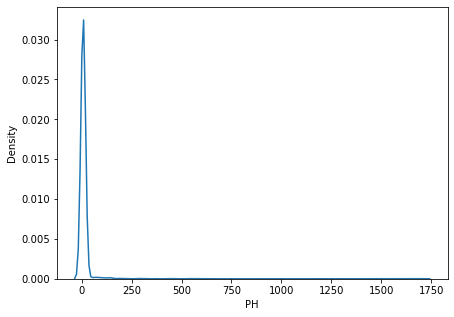

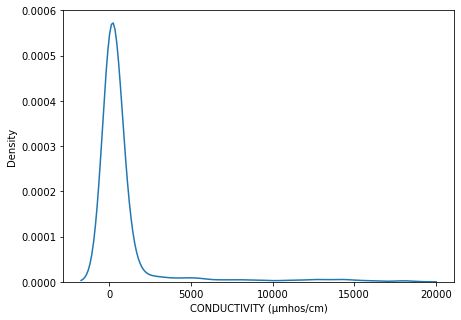

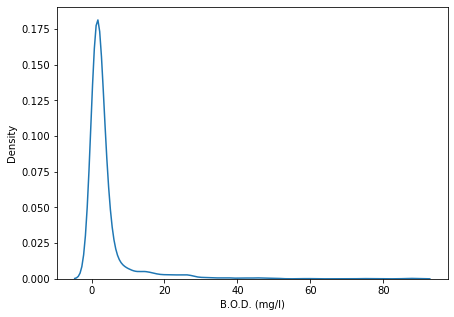

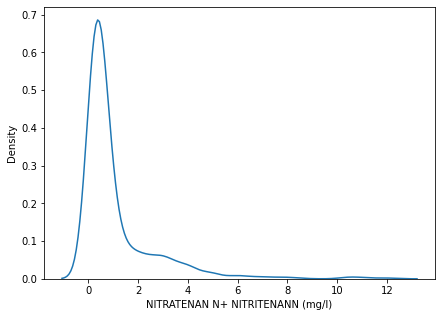

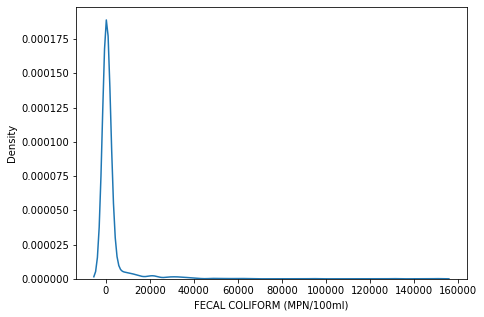

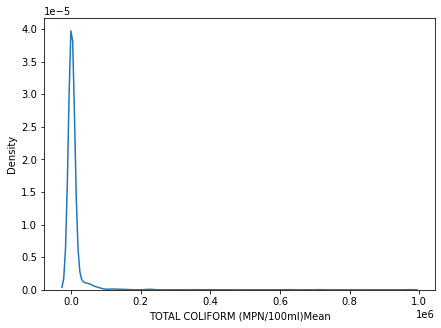

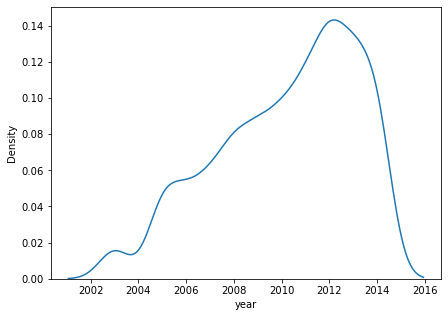

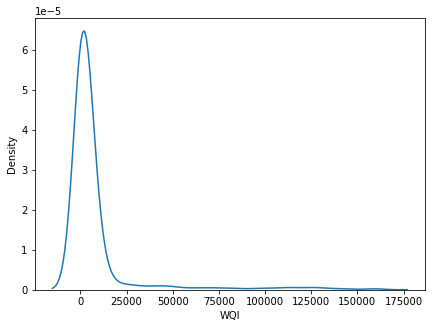

In [53]:
plot_kde(dataset_wqi.select_dtypes(exclude="object"))

In [54]:
features = list(dataset_wqi.columns)[:-1]
dataset_features = dataset_wqi[features]
dataset_features.describe()

,index,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,970.058662,26.205174,6.457782,12.055932,933.097604,3.923418,1.101084,2200.225151,7052.860746,2010.212719
std,564.017904,3.243498,1.250771,52.831753,2577.234656,7.047804,1.592417,8163.851838,39748.500170,2.902650
min,0.000000,10.000000,0.000000,0.000000,3.700000,0.100000,0.000000,0.000000,0.000000,2003.000000
25%,480.750000,24.800000,6.000000,6.900000,79.000000,1.100000,0.268750,41.000000,108.750000,2008.000000
50%,971.500000,27.000000,6.700000,7.300000,175.000000,1.800000,0.516000,221.000000,468.000000,2011.000000
75%,1456.250000,28.200000,7.200000,7.650000,462.500000,3.400000,1.040000,621.000000,1605.750000,2013.000000
max,1989.000000,35.000000,10.000000,1708.000000,18291.000000,88.000000,12.150000,150250.000000,967500.000000,2014.000000


In [55]:
y = dataset_wqi['WQI']
y.describe()

count      1824.000000
mean       8195.476112
std       22808.775535
min           0.638365
25%         627.941235
50%        1482.935110
75%        4008.071367
max      161826.824689
Name: WQI, dtype: float64

In [56]:
dataset_wqi.head()

,index,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,WQI
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.1,11.0,27.0,2014.0,1714.987718
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0,2014.0,1578.649113
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0,2014.0,1501.577098
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0,2014.0,474.663944
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0,2014.0,643.174383


In [57]:
X_classif=dataset_wqi.iloc[:, 7:]
X_classif.drop(['year'], axis=1, inplace=True)
X_classif

,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
0,203.0,1.8965,0.100,11.000,27.0,1714.987718
1,189.0,2.0000,0.200,4953.000,8391.0,1578.649113
2,179.0,1.7000,0.100,3243.000,5330.0,1501.577098
3,64.0,3.8000,0.500,5382.000,8443.0,474.663944
4,83.0,1.9000,0.400,3428.000,5500.0,643.174383
...,...,...,...,...,...,...
1853,7.2,1.2000,0.568,0.568,35.0,12.967955
1855,7.5,1.4000,0.609,0.609,205.0,2.120927
1856,7.2,2.7000,0.518,0.518,202.0,20.172739
1858,6.2,1.2000,0.516,221.000,570.0,1.045531


In [58]:
X_cluster=dataset_wqi.iloc[:, -2:]
X_cluster

,year,WQI
0,2014.0,1714.987718
1,2014.0,1578.649113
2,2014.0,1501.577098
3,2014.0,474.663944
4,2014.0,643.174383
...,...,...
1853,2003.0,12.967955
1855,2003.0,2.120927
1856,2003.0,20.172739
1858,2003.0,1.045531


In [59]:
dataset_wqi=dataset_wqi.drop(['STATION CODE', 'LOCATIONS', 'STATE', 'year','index'], axis=1)
dataset_wqi

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,WQI
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0,1714.987718
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0,1578.649113
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0,1501.577098
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0,474.663944
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0,643.174383
...,...,...,...,...,...,...,...,...,...
1853,27.0,7.5,293.0,7.2,1.2000,0.568,0.568,35.0,12.967955
1855,28.0,7.0,136.0,7.5,1.4000,0.609,0.609,205.0,2.120927
1856,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0,20.172739
1858,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0,1.045531


In [60]:
X=dataset_wqi.iloc[:, :-1]
X

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
0,30.6,6.7,7.5,203.0,1.8965,0.100,11.000,27.0
1,29.8,5.7,7.2,189.0,2.0000,0.200,4953.000,8391.0
2,29.5,6.3,6.9,179.0,1.7000,0.100,3243.000,5330.0
3,29.7,5.8,6.9,64.0,3.8000,0.500,5382.000,8443.0
4,29.5,5.8,7.3,83.0,1.9000,0.400,3428.000,5500.0
...,...,...,...,...,...,...,...,...
1853,27.0,7.5,293.0,7.2,1.2000,0.568,0.568,35.0
1855,28.0,7.0,136.0,7.5,1.4000,0.609,0.609,205.0
1856,27.0,7.9,738.0,7.2,2.7000,0.518,0.518,202.0
1858,28.0,7.6,98.0,6.2,1.2000,0.516,221.000,570.0


In [61]:
X.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,26.205174,6.457782,12.055932,933.097604,3.923418,1.101084,2200.225151,7052.860746
std,3.243498,1.250771,52.831753,2577.234656,7.047804,1.592417,8163.851838,39748.500170
min,10.000000,0.000000,0.000000,3.700000,0.100000,0.000000,0.000000,0.000000
25%,24.800000,6.000000,6.900000,79.000000,1.100000,0.268750,41.000000,108.750000
50%,27.000000,6.700000,7.300000,175.000000,1.800000,0.516000,221.000000,468.000000
75%,28.200000,7.200000,7.650000,462.500000,3.400000,1.040000,621.000000,1605.750000
max,35.000000,10.000000,1708.000000,18291.000000,88.000000,12.150000,150250.000000,967500.000000


In [62]:
X.corr()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
Temp,1.000000,-0.028351,0.016845,0.113511,-0.198372,-0.406387,-0.196656,-0.175384
D.O. (mg/l),-0.028351,1.000000,0.090070,-0.149356,-0.408464,-0.190698,-0.247697,-0.147139
PH,0.016845,0.090070,1.000000,-0.032270,-0.009069,-0.031747,-0.022140,-0.012754
CONDUCTIVITY (µmhos/cm),0.113511,-0.149356,-0.032270,1.000000,0.087832,0.038679,0.013732,0.003211
B.O.D. (mg/l),-0.198372,-0.408464,-0.009069,0.087832,1.000000,0.418394,0.345390,0.239501
NITRATENAN N+ NITRITENANN (mg/l),-0.406387,-0.190698,-0.031747,0.038679,0.418394,1.000000,0.339371,0.211613
FECAL COLIFORM (MPN/100ml),-0.196656,-0.247697,-0.022140,0.013732,0.345390,0.339371,1.000000,0.674944
TOTAL COLIFORM (MPN/100ml)Mean,-0.175384,-0.147139,-0.012754,0.003211,0.239501,0.211613,0.674944,1.000000


In [63]:
X.shape

(1824, 8)

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[0]

array([ 1.35533645,  0.19370772, -0.08625838, -0.28336489, -0.28767459,
       -0.6288295 , -0.26823435, -0.17680636])

# Feature Selection

In [65]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

features=[]
r2=[]

def iter_1(i):
  selector = SelectKBest(f_classif, k=i)
  selector.fit(X, y)
  X_=selector.transform(X)
  train_X, test_X, train_y, test_y = train_test_split(X_, y, test_size = 0.30, random_state = 0)
  model=RandomForestRegressor()
  model.fit(train_X,train_y)
  prediction=model.predict(test_X)
  r2score=r2_score(test_y,prediction)
  r2.append(r2score)
  features.append(i)

In [66]:
for i in range(2,X.shape[1]):
  iter_1(i)

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encou

In [67]:
r2_df = pd.DataFrame(r2)
feat_df=pd.DataFrame(features)

pd.concat([r2_df, feat_df], axis=1)

,0,0
0,-0.368135,2
1,-0.084857,3
2,-0.031101,4
3,0.999893,5
4,0.999912,6
5,0.999873,7


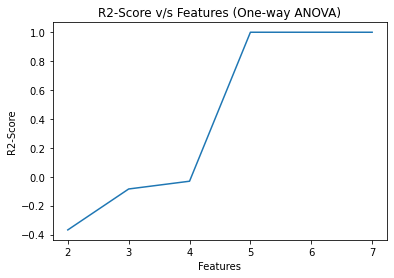

In [68]:
plt.plot(features, r2)
plt.xlabel('Features')
plt.ylabel('R2-Score')
  
plt.title('R2-Score v/s Features (One-way ANOVA)')
  
plt.show()

In [69]:
selector = SelectKBest(f_classif, k=5)
selector.fit(X, y)
X_new=selector.transform(X)
X_new

C:\Users\vaish\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


array([[-0.28336489, -0.28767459, -0.6288295 , -0.26823435, -0.17680636],
       [-0.28879856, -0.27298514, -0.56601466,  0.33728316,  0.03367438],
       [-0.29267975, -0.31556326, -0.6288295 ,  0.12776577, -0.04335593],
       ...,
       [-0.35935863, -0.17363619, -0.3662635 , -0.26951866, -0.17240247],
       [-0.35974675, -0.3865268 , -0.3675198 , -0.24250415, -0.16314172],
       [-0.35963031, -0.37233409, -0.3675198 , -0.24250415, -0.16334304]])

In [70]:
from sklearn.model_selection import train_test_split
xnewtrain,xnewtest,ynewtrain,ynewtest=train_test_split(X_new,y,random_state=0)

In [71]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xnewtrain, ynewtrain)

LinearRegression()

In [72]:
y_pred=linreg.predict(xnewtest)

In [73]:
from sklearn.metrics import r2_score
r2_score(ynewtest, y_pred)

0.9999983965973567

In [74]:
#coeffs and bias
print(linreg.coef_)
print(linreg.intercept_)

[ 2.28028948e+04 -6.35481930e+00  6.14105958e+00 -1.41258810e+00
  1.88547293e+00]
8195.599311575279


# Feature Selection + Dimension Reduction

In [75]:
from sklearn.decomposition import PCA
pca=PCA(3)
xpca=pca.fit_transform(X_new)

In [76]:
X_new

array([[-0.28336489, -0.28767459, -0.6288295 , -0.26823435, -0.17680636],
       [-0.28879856, -0.27298514, -0.56601466,  0.33728316,  0.03367438],
       [-0.29267975, -0.31556326, -0.6288295 ,  0.12776577, -0.04335593],
       ...,
       [-0.35935863, -0.17363619, -0.3662635 , -0.26951866, -0.17240247],
       [-0.35974675, -0.3865268 , -0.3675198 , -0.24250415, -0.16314172],
       [-0.35963031, -0.37233409, -0.3675198 , -0.24250415, -0.16334304]])

In [77]:
pca.explained_variance_ratio_

array([0.42716303, 0.21004779, 0.18532183])

In [78]:
print(pd.DataFrame(pca.components_,columns=['CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean'],index = ['PC-1','PC-2','PC-3']))

      CONDUCTIVITY (µmhos/cm)  B.O.D. (mg/l)  \
PC-1                 0.058162       0.450469   
PC-2                -0.763201      -0.356577   
PC-3                 0.637471      -0.366957   

      NITRATENAN N+ NITRITENANN (mg/l)  FECAL COLIFORM (MPN/100ml)  \
PC-1                          0.437075                    0.576940   
PC-2                         -0.301693                    0.252176   
PC-3                         -0.494058                    0.238885   

      TOTAL COLIFORM (MPN/100ml)Mean  
PC-1                        0.519422  
PC-2                        0.368464  
PC-3                        0.397257  


In [79]:
pca.components_

array([[ 0.05816212,  0.45046911,  0.43707526,  0.57694045,  0.51942245],
       [-0.76320061, -0.35657744, -0.30169309,  0.25217571,  0.36846444],
       [ 0.63747149, -0.36695709, -0.49405796,  0.23888473,  0.39725736]])

In [80]:
xpca_train,xpca_test,ytrain,ytest=train_test_split(xpca,y,random_state=0)

In [81]:
pca_linreg=LinearRegression()
pca_linreg.fit(xpca_train,ytrain)
ypca_pred=pca_linreg.predict(xpca_test)

In [82]:
from sklearn.metrics import r2_score
r2_score(ytest, ypca_pred)

0.9944720937057101

In [83]:
print(pca_linreg.coef_)
print(pca_linreg.intercept_)

[  1313.21217797 -17426.23289268  14519.70096744]
8198.137771333564


# Clustering WQI - Year

In [84]:
X_cluster=X_cluster.values

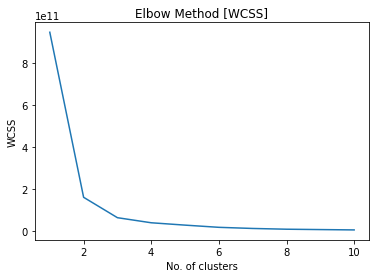

In [85]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1, 11):
    km=KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(X_cluster)
    wcss.append(km.inertia_)
wcss
plt.plot(range(1,11), wcss)
plt.title("Elbow Method [WCSS]")
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.show()

In [86]:
km=KMeans(n_clusters=3, init='k-means++', random_state=0)
# making  a dependent variable for categories - by predict
y_kmeans=km.fit_predict(X_cluster)
np.unique(y_kmeans)

array([0, 1, 2])

In [87]:
X_cluster

array([[2.01400000e+03, 1.71498772e+03],
       [2.01400000e+03, 1.57864911e+03],
       [2.01400000e+03, 1.50157710e+03],
       ...,
       [2.00300000e+03, 2.01727392e+01],
       [2.00300000e+03, 1.04553143e+00],
       [2.00300000e+03, 5.44652476e+00]])

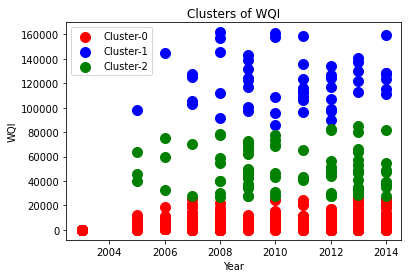

In [88]:
# visualizing the clusters on the plot

# for cluster 0
# X[y_kmeans==0,0], y_kmeans==0 means where predicter cluster=0, and 0 means the x coordinate for the graph ie, year
# X[y_kmeans==0,1], y_kmeans==0 means where predicter cluster=0, and 1 means the x coordinate for the graph ie, wqi
plt.scatter(X_cluster[y_kmeans==0,0], X_cluster[y_kmeans==0,1], s=100, c='red', label='Cluster-0')
# for cluster 1
plt.scatter(X_cluster[y_kmeans==1,0], X_cluster[y_kmeans==1,1], s=100, c='blue', label='Cluster-1')
# for cluster 2
plt.scatter(X_cluster[y_kmeans==2,0], X_cluster[y_kmeans==2,1], s=100, c='green', label='Cluster-2')

plt.title('Clusters of WQI')
plt.xlabel('Year')
plt.ylabel('WQI')
plt.legend()
plt.show()

In [89]:
unique=np.unique(X_cluster[:, 0])
unique=np.asarray(unique, dtype = 'int')
unique

array([2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [90]:
Xcluster=pd.DataFrame(X_cluster, columns=['year', 'WQI'])
def NormalizeData(data):
    return (data - min(data)) / (max(data) - min(data)) * 100
Xcluster["WQI_normalized"] = NormalizeData(Xcluster["WQI"])

In [91]:
Xcluster

,year,WQI,WQI_normalized
0,2014.0,1714.987718,1.059377
1,2014.0,1578.649113,0.975127
2,2014.0,1501.577098,0.927501
3,2014.0,474.663944,0.292923
4,2014.0,643.174383,0.397053
...,...,...,...
1819,2003.0,12.967955,0.007619
1820,2003.0,2.120927,0.000916
1821,2003.0,20.172739,0.012071
1822,2003.0,1.045531,0.000252


In [92]:
result=Xcluster.groupby('year')['WQI_normalized'].mean()
result

year
2003.0    0.010638
2005.0    2.821284
2006.0    3.934959
2007.0    4.927742
2008.0    5.913037
2009.0    8.392865
2010.0    5.216372
2011.0    5.434135
2012.0    4.487225
2013.0    4.967854
2014.0    5.051424
Name: WQI_normalized, dtype: float64

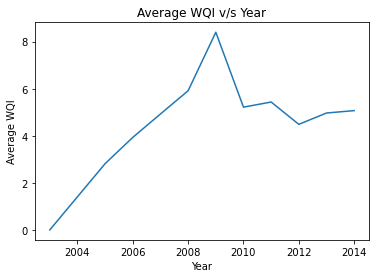

In [93]:
result={2003.0:0.011032, 2005.0:2.821667,2006.0: 3.935338,2007.0 :4.928117,2008.0:5.913408,2009.0:8.393226,2010.0:5.216746,2011.0:5.434508,2012.0: 4.487602,2013.0: 4.968229,2014.0:5.069728}
l1=result.items()
l1=sorted(l1)
x1,y1=zip(*l1)
plt.plot(x1,y1)
plt.xlabel('Year')
plt.ylabel('Average WQI')

plt.title('Average WQI v/s Year')
plt.show()